Модуль functools

В рамках прошлого курса мы рассматривали функцию reduce() из модуля functools. 

Функция reduce() из модуля functools в Python используется для применения функции к элементам последовательности (например, списка) с целью свертки (редукции) этой последовательности в одно значение. Она итеративно применяет функцию к паре элементов, затем к результату и следующему элементу, и так далее, пока не останется единственный результат.

Вот базовый синтаксис функции:

functools.reduce(function, iterable[, initializer])

function: функция, которая принимает два аргумента и возвращает одно значение.
iterable: последовательность (например, список, кортеж), по которой будет производиться свертка.
initializer (необязательный аргумент): начальное значение, которое будет использовано в качестве первого аргумента функции при первом вызове.

In [1]:
from functools import reduce

numbers = [1, 2, 3, 4]

result = reduce(lambda x, y: x * y, numbers)
print(result)  # Вывод: 24

24


reduce() применяет функцию к первым двум элементам (1 и 2), затем результат умножает на 3, и потом на 4, в итоге получаем 24.

Если мы добавим начальное значение, то оно будет использовано как первый аргумент функции в первой итерации:

In [ ]:
result = reduce(lambda x, y: x + y, numbers, 10)
print(result)  # Вывод: 20

Функция начинает с того, что прибавляет 10 к первому элементу списка, затем результат прибавляется ко второму, и так далее.

Помимо данной функции модуль functools предоставляет множество других полезных функций высшего порядка, которые можно использовать для кэширования, перегрузки, создания декораторов и в целом для того, чтобы делать код более функциональным.

Функция partial()

Частичное применение функций — это техника, основанная на возможности возвращать функции из других функций. Предположим, мы написали функцию multiply(), которая перемножает два числа:

In [2]:
def multiply(a, b):
    return a * b


print(multiply(2, 3))

6


Пусть нам теперь нужны функции, которые удваивают и утраивают некоторое число. Такие функции могут быть определены на основе уже существующей функции multiply() следующим образом:

In [3]:
def double(num):
    return multiply(2, num)


def triple(num):
    return multiply(3, num)

Когда сценариев работы функции всего несколько, конечно, логичнее сделать, как показано выше, то есть явно определить новые функции. Но когда нужно написать очень много новых функций, то смысла переписывать один и тот же код столько раз нет. Здесь нам на помощь приходит частичное применение функций.

Частичное применение позволяет на основе старой функции создать новую, которая "частично применена".

В Python для использования частичного применения используется функция partial() из модуля functools.

Сигнатура функции следующая: partial(func, *args, **kwargs). Данная функция возвращает специальный partial объект, который при вызове вызывается как функция func, в которую дополнительно передаются позиционные аргументы args и именованные аргументы kwargs

Функция partial() возвращает partial объект, который при вызове ведет себя как функция.

Приведенный выше код можно переписать с использованием функции partial() в виде:

In [4]:
from functools import partial


def multiply(a, b):
    return a * b


double = partial(multiply, 2)
triple = partial(multiply, 3)

print(double(5))  # 2 * 5
print(triple(10))  # 3 * 10

10
30


Обратите внимание на то, что мы зафиксировали только один аргумент, поэтому новые partial объекты теперь ожидают только один аргумент. Если мы попытаемся передать более одного аргумента, то получим ошибку.

In [5]:
print(double(5, 6))

TypeError: multiply() takes 2 positional arguments but 3 were given

Мы можем также зафиксировать оба аргумента в функции multiply()

In [6]:
multiply_two_and_five = partial(multiply, 2, 5)

print(multiply_two_and_five())  # вызываем уже без аргументов

10


При формировании новой функции с использованием partial() мы можем передавать не только позиционные аргументы, но и именованные. Вспомним, что встроенная функция int(), помимо конвертируемого значения, также принимает именованный аргумент base, имеющий по умолчанию значение 10. Данный аргумент отвечает за основание системы счисления конвертируемого значения.

In [7]:
print(int('123'))
print(int('123', base=5))
print(int('1001', base=2))
print(int('A12B', base=16))

123
38
9
41259


Зафиксировав значение именованного аргумента base, мы можем получить функцию basetwo(), которая переводит число из двоичной системы счисления в десятичную.

In [8]:
from functools import partial

basetwo = partial(int, base=2)

print(basetwo('101'))
print(basetwo('1000'))
print(basetwo('11111'))

5
8
31


Если другие аргументы передаются при вызове функции, то позиционные добавляются в конец, а именованные расширяются и перезаписываются.

функция partial() лишь запоминает функцию и набор позиционных и именованных аргументов для нее, тем самым позволяя вызывать исходную функцию с меньшим количеством аргументов. Когда мы вызываем полученный объект partial, он вызывает исходную функцию, сначала передавая все сохраненные позиционные аргументы, затем все позиционные аргументы, указанные при текущем вызове, затем все сохраненные именованные аргументы, затем все именованные аргументы, указанные при текущем вызове:

In [ ]:
from functools import partial


def func1(a, b, c, d, e):
    return a + b + c + d + e


func2 = partial(func1, 1, 2)
func2(3, 4, 5)  # эквивалентно func1(1, 2, 3, 4, 5)

func3 = partial(func1, d=4, e=5)
func3(1, 2, 3)  # эквивалентно func1(1, 2, 3, d=4, e=5)

func4 = partial(func1, 1, e=5)
func4(2, 3, d=4)  # эквивалентно func1(1, 2, 3, d=4, e=5)

func5 = partial(func1, a=1, b=2)
func5(3, 4, 5)  # эквивалентно func1(3, 4, 5, a=1, b=2), что приводит к ошибке, так как a и b переданы дважды

Объекты, возвращаемые функцией partial()

Как уже было сказано выше, функция partial() возвращает специальные partial объекты, которые при вызове ведут себя как функции. Такие объекты содержат три полезных атрибута:

func — исходная функция
args — зафиксированные позиционные аргументы (тип tuple)
keywords — зафиксированные именованные аргументы (тип dict)
При необходимости к ним можно получить доступ с помощью стандартной точечной нотации.

In [20]:
from functools import partial


def pretty_print(text, symbol, count):
    print(symbol * count)
    print(text)
    print(symbol * count)


star_pretty_print = partial(pretty_print, 'Hi!!!', symbol='*')

star_pretty_print(count=7)

print(star_pretty_print.args)  # кортеж
print(star_pretty_print.keywords)  # словарь

star_pretty_print.func('Исходная функция', symbol='~', count=20)

*******
Hi!!!
*******
('Hi!!!',)
{'symbol': '*'}
~~~~~~~~~~~~~~~~~~~~
Исходная функция
~~~~~~~~~~~~~~~~~~~~


Функция update_wrapper()

Как несложно заметить, частичное применение с помощью функции partial() работает подобно декоратору. При этом у partial объекта нет явных атрибутов __name__ и __doc__ от начальной функции. Доступ к этим атрибутам возможен только через исходную функцию с помощью атрибута func

In [21]:
from functools import partial


def multiply(a, b):
    '''Функция перемножает два числа и возвращает вычисленное значение.'''
    return a * b


double = partial(multiply, 2)

print(double.func.__name__)
print(double.func.__doc__)

multiply
Функция перемножает два числа и возвращает вычисленное значение.


С помощью функции update_wrapper() из модуля functools можно скопировать и добавить атрибуты __name__ и __doc__ из исходной функции в partial объект.

In [22]:
from functools import partial, update_wrapper


def multiply(a, b):
    '''Функция перемножает два числа и возвращает вычисленное значение.'''
    return a * b


double = partial(multiply, 2)

update_wrapper(double, multiply)  # копируем информацию из функции multiply в partial объект double

print(double.__name__)
print(double.__doc__)

multiply
Функция перемножает два числа и возвращает вычисленное значение.


Примечания

Примечание 4. Функция partial() возвращает partial объект, который при вызове ведет себя как функция.

In [23]:
from functools import partial


def multiply(a, b):
    return a * b


double = partial(multiply, 2)

print(type(double))

<class 'functools.partial'>


Примечание 6. Декоратор functools.wraps уже изучался нами в рамках одного из прошлых уроков. Данный декоратор использует функцию update_wrapper() для копирования атрибутов __name__ и __doc__.

In [26]:
from functools import partial


def add(a, b):
    '''documentation'''
    return a + b


add_one = partial(add, 1)

print(dir(add_one))
# print(add_one.__name__)
# print(add_one.__doc__)

['__call__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__vectorcalloffset__', 'args', 'func', 'keywords']


In [27]:
from functools import partial


def add(a, b):
    return a + b


add_one = partial(add, 1)

print(add_one.func.__name__)
print(add_one.func(2, 3))

add
5


In [28]:
from functools import partial

beegeek = partial(print, 'beegeek')

beegeek('stepik', 'python')

beegeek stepik python


In [29]:
from functools import partial

beegeek = partial(print, sep=', ')

beegeek('beegeek', 'stepik', 'python', sep='-')

beegeek-stepik-python


Две функции
Вам доступна уже реализованная функция send_email(), которая принимает три аргумента в следующем порядке:

name — имя
email_address — адрес электронной почты
text — содержание письма
Функция отправляет письмо пользователю с именем name на адрес email_address с содержанием text.

1. Реализуйте функцию to_Timur() с помощью функции partial(), которая принимает один аргумент:

text — содержание письма
Функция должна отправлять письмо пользователю с именем Тимур на адрес timyrik20@beegeek.ru с содержанием text.

2. Реализуйте функцию send_an_invitation() с помощью функции partial(), которая принимает два аргумента в следующем порядке:

name — имя
email_address — адрес электронной почты
Функция должна отправлять письмо на имя name и на адрес email_address со следующим содержанием:

Школа BEEGEEK приглашает Вас на новый курс по программированию на языке Python. тутут....
Примечание 1. Функции to_Timur() и send_an_invitation() должны являться partial объектами.

Примечание 2. В тестирующую систему сдайте программу, содержащую только необходимые функции to_Timur() и send_an_invitation(), но не код, вызывающий их.

In [40]:
from functools import partial


def send_email(name, email_address, text):
    return f'В письме для {name} на адрес {email_address} сказано следующее: {text}'


to_Timur = partial(send_email, 'Тимур', 'timyrik20@beegeek.ru')
send_an_invitation = partial(send_email,
                             text='Школа BEEGEEK приглашает Вас на новый курс по программированию на языке Python. тутут....')

to_Timur('nnn')
send_an_invitation('Тимур', 'timyrik20@beegeek.ru')

'В письме для Тимур на адрес timyrik20@beegeek.ru сказано следующее: Школа BEEGEEK приглашает Вас на новый курс по программированию на языке Python. тутут....'

In [ ]:
from functools import partial, update_wrapper

to_Timur = partial(send_email, 'Тимур', 'timyrik20@beegeek.ru')
update_wrapper(to_Timur, send_email)
send_an_invitation = partial(send_email,
                             text='Школа BEEGEEK приглашает Вас на новый курс по программированию на языке Python. тутут....')
update_wrapper(send_an_invitation, send_email)

Кэширование и мемоизация

Кэширование – это способ оптимизации хранения данных, при котором операции с данными производятся эффективнее.

Мемоизация — это разновидность кэширования. Обычно под кэшированием понимают довольно широкий набор способов сохранения чего-либо для последующего использования. Мемоизация же означает кэширование возвращаемых значений функций.

Вот некоторые соображения, касающиеся использования мемоизации:

для того чтобы функцию можно было подвергнуть мемоизации, она должна быть чистой (см. примечание 7)
мемоизация — это компромисс между производительностью и потреблением памяти
мемоизация хороша для функций, имеющих сравнительно небольшой диапазон входных значений, что позволяет достаточно часто, при повторных вызовах функций, задействовать значения, найденные ранее, не тратя на хранение данных слишком много памяти
лучше всего функции с мемоизацией показывают себя там, где выполняются сложные, ресурсоёмкие вычисления

Примечание 7. Чистая функция — это функция, которая:

является детерминированной
не обладает побочными эффектами
Наличия только одного из свойств недостаточно для того, чтобы функция была чистой.

Функция является детерминированной, если для одного и того же набора входных значений она возвращает одинаковый результат. В большинстве языков программирования функции в процессе выполнения своих вычислений могут модифицировать значения глобальных переменных, осуществлять операции ввода-вывода, реагировать на исключительные ситуации, вызывая их обработчики. Такие функции называются функциями с побочными эффектами. Другим видом побочных эффектов является модификация переданных в функцию аргументов, когда в процессе вычисления результирующего значения функции изменяется и значение входного аргумента.

Чистые функции не производят никаких наблюдаемых побочных эффектов, только возвращают результат. Не меняют глобальных переменных, ничего никуда не посылают и не печатают, не трогают объектов, и так далее. Принимают данные, что-то вычисляют, учитывая только аргументы, и возвращают новые данные.

Мы уже сталкивались с мемоизацией в рамках урока по изучению рекурсии.

In [ ]:
def fib(n):
    cache = {1: 1, 2: 1}

    def fib_rec(n):
        result = cache.get(n)
        if result is None:
            result = fib_rec(n - 2) + fib_rec(n - 1)
            cache[n] = result
        return result

    return fib_rec(n)

демонстрирует применение мемоизации к функции вычисления чисел Фибоначчи. При такой реализации функции fib() сначала происходит проверка на наличие уже вычисленного элемента, и если он находится, то сразу возвращается его значение.

Несложно написать и декоратор общего типа, мемоизирующий любую чистую функцию:

In [ ]:
import functools


def cached(func):
    cache = {}

    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        key = args + tuple(kwargs.items())
        result = cache.get(key)
        if result is None:
            result = func(*args, **kwargs)
            cache[key] = result
        return result

    return wrapper

В этой простой реализации мемоизации есть очевидная проблема: содержимое словаря cache будет неограниченно расти при каждом вызове декорируемой функции с новыми аргументами.

Для решения такого рода проблемы существуют различные стратегии кэширования.

Стратегии кэширования

Существует несколько различных стратегий, которые можно использовать для удаления элементов из кэша и предотвращения превышения его максимального размера. Пять самых популярных перечислены в таблице ниже.

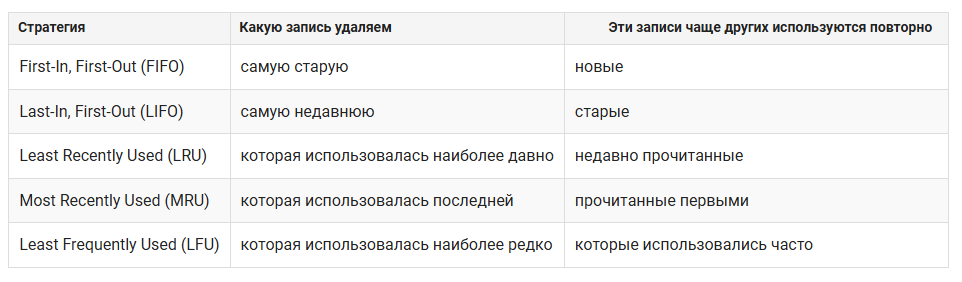

In [41]:
from functions import picture

picture('fgjhjkyhk.png')

Стратегия LRU представляет собой метод управления кэшем, в котором данные, которые дольше всего не использовались, считаются наименее ценными, и они удаляются из кэша в первую очередь при необходимости освободить место для новых данных. Кэш, реализованный посредством стратегии LRU, упорядочивает элементы в порядке их использования. Каждый раз, когда мы обращаемся к записи, алгоритм LRU перемещает ее в верхнюю часть кэша. Таким образом, алгоритм может быстро определить запись, которая дольше всех не использовалась, проверив конец списка.

Декоратор lru_cache

В модуле functools уже реализован декоратор lru_cache, дающий возможность кэшировать результат вычисления функции, используя стратегию Least Recently Used. Это простой, но мощный метод, который позволяет использовать в коде возможности кэширования.

Декоратор lru_cache доступен начиная с Python 3.2.

In [ ]:
from functools import lru_cache


@lru_cache()
def fibonacci(n):
    if n <= 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

добавляет кэширование к функции fibonacci(). Декоратор lru_cache сохраняет результаты вызова fibonacci() для каждого уникального значения аргумента.

В Python 3.8 и выше, если мы не передаем никаких аргументов, то можно использовать декоратор lru_cache без скобок. В более ранних версиях необходимо добавить круглые скобки: lru_cache()

Аргументы декоратора lru_cache

При декорировании функций с помощью декоратора lru_cache мы можем использовать следующие аргументы:

maxsize=128 — максимальный размер кэша (тип int)
typed=False — как кэшировать при разных типах аргументов (тип bool)

Если для параметра maxsize установлено значение None, то кэш может расти без ограничений.

Если для typed задано значение True, то результаты вызовов функции для аргументов разных типов будут кэшироваться отдельно. Например, f(3) и f(3.0) будут рассматриваться как отдельные вызовы с разными результатами. Если для typed задано значение False, то вызовы будут рассматриваться как одинаковые.

In [42]:
from functools import lru_cache


@lru_cache(typed=False)
def concat(text, num):
    return text + ' ' + str(num)


print(concat('beegeek', 4))
print(concat('beegeek', 5.0))
print(concat('beegeek', 4.0))

beegeek 4
beegeek 5.0
beegeek 4


Как мы видим, третий вызов функции с аргументами ('beegeek', 4.0) использует закэшированный результат первого вызова с аргументами ('beegeek', 4).

In [43]:
from functools import lru_cache


@lru_cache(typed=True)
def concat(text, num):
    return text + ' ' + str(num)


print(concat('beegeek', 4))
print(concat('beegeek', 5.0))
print(concat('beegeek', 4.0))

beegeek 4
beegeek 5.0
beegeek 4.0


Дополнительные методы декоратора lru_cache

Чтобы помочь измерить эффективность кэша и настроить параметр maxsize, декорированная функция имеет метод cache_info(), который возвращает именованный кортеж, показывающий hits, misses, maxsize и currsize

Мы можем использовать информацию, возвращаемую cache_info(), чтобы понять, как работает кэш, и настроить его, чтобы найти подходящий баланс между скоростью работы и объемом памяти:

hits – количество значений, которые lru_cache вернул непосредственно из памяти, поскольку они присутствовали в кэше
misses – количество значений, которые были вычислены, а не взяты из памяти
maxsize – это размер кэша, который мы определили, передав его декоратору
currsize – текущий размер кэша

In [44]:
from functools import lru_cache


@lru_cache(typed=False)
def concat(text, num):
    return text + ' ' + str(num)


print(concat('beegeek', 1))
print(concat('beegeek', 1.0))
print(concat('beegeek', True))
print(concat('beegeek', 4.0))
print(concat('beegeek', 5))

print(concat.cache_info())

beegeek 1
beegeek 1
beegeek 1
beegeek 4.0
beegeek 5
CacheInfo(hits=2, misses=3, maxsize=128, currsize=3)


Декоратор lru_cache также предоставляет метод cache_clear() для очистки кэша.

In [45]:
from functools import lru_cache


@lru_cache(typed=False)
def concat(text, num):
    return text + ' ' + str(num)


print(concat('beegeek', 1))
print(concat('beegeek', 1.0))
print(concat('beegeek', True))
print(concat('beegeek', 4.0))
print(concat('beegeek', 5))

print(concat.cache_info())
concat.cache_clear()
print(concat.cache_info())

beegeek 1
beegeek 1
beegeek 1
beegeek 4.0
beegeek 5
CacheInfo(hits=2, misses=3, maxsize=128, currsize=3)
CacheInfo(hits=0, misses=0, maxsize=128, currsize=0)


Максимальный размер кэша можно задать вручную через параметр maxsize в @lru_cache(maxsize=N)

Если maxsize=None, кэш будет бесконечным, то есть хранить все вычисленные значения, пока работает программа

Примечание 3. Кэширование – один из подходов, который при правильном использовании значительно ускоряет работу и снижает нагрузку на вычислительные ресурсы. Кэширование очень часто используется в реальных проектах.

Примечание 4. Будьте осторожны с мемоизацией функций, которые принимают изменяемые типы данных в качестве аргументов. Встроенный декоратор lru_cache не позволяет работать с нехэшируемыми объектами, так как за кулисами использует словарь.

Примечание 6. В Python 3.9 появился декоратор cache, который работает так же, как и lru_cache, но без ограничений на размер кэша. По сути, применение декоратора cache равнозначно применению декоратору lru_cache(maxsize=None). Такой декоратор работает быстрее чем lru_cache c заданным maxsize, но потребляет больше памяти.

In [49]:
from functools import cache


@cache
def fibonacci(n):
    print(f"Вычисляем({n})...")
    if n <= 2:
        return 1
    return fibonacci(n - 1) + fibonacci(n - 2)


# Вызываем функцию
print(fibonacci(10))  # Первый раз вычисляет с выводом
print(fibonacci(10))  # Второй раз берёт из кэша (без вычислений)

print(fibonacci.cache_info())

Вычисляем(10)...
Вычисляем(9)...
Вычисляем(8)...
Вычисляем(7)...
Вычисляем(6)...
Вычисляем(5)...
Вычисляем(4)...
Вычисляем(3)...
Вычисляем(2)...
Вычисляем(1)...
55
55
CacheInfo(hits=8, misses=10, maxsize=None, currsize=10)


In [ ]:
from functools import lru_cache


@lru_cache()
def add_one(number):
    print(number + 1, end=' ')


numbers = [1, 2, 3, 1, 3, 4, 4, 1]

for i in numbers:
    add_one(i)

функция идет по элементам списка, попутно записывая значение None в словарь:

1-я итерация. Кэш: {1: None} :

принтит 2

возвращает None

Строка вывода: 2 

2-я итерация. Кэш: {1: None, 2: None} :

принтит 3

Возвращает None

Строка вывода: 2 3 

3-я итерация. Кэш: {1: None, 2: None, 3: None} :

принтит 4

Возвращает None

Строка вывода: 2 3 4 

4-я итерация. Кэш: {1: None, 2: None, 3: None} :

принт НЕ выполняется, так как функция берет значение из кэша и сразу возвращает None, не доходя до строки с инструкцией print

Строка вывода: 2 3 4 

5-я итерация. Кэш: {1: None, 2: None, 3: None} :

принт НЕ выполняется, так как функция берет значение из кэша и сразу возвращает None, не доходя до строки с инструкцией print

Строка вывода: 2 3 4 

6-я итерация. Кэш: {1: None, 2: None, 3: None, 4: None} :

принтит 5 

Возвращает None

Строка вывода: 2 3 4 5  

7-я итерация. Кэш: {1: None, 2: None, 3: None, 4: None} :

принт НЕ выполняется, так как функция берет значение из кэша и сразу возвращает None, не доходя до строки с инструкцией print

Строка вывода: 2 3 4 5 

8-я итерация. Кэш: {1: None, 2: None, 3: None, 4: None} :

принт НЕ выполняется, так как функция берет значение из кэша и сразу возвращает None, не доходя до строки с инструкцией print

Строка вывода: 2 3 4 5 

In [ ]:
from functools import lru_cache


@lru_cache()
def average(numbers):
    return sum(numbers) / len(numbers)


numbers = [1, 2, 3, 4, 5]

print(average(numbers))
print(average(numbers))

Код даже не доходит до выполнения sum(numbers) / len(numbers), так как проблема возникает в механизме кэширования lru_cache

Функция lru_cache() требует, чтобы все аргументы были хешируемыми типами данных, так как она использует их в качестве ключей для кэша.

Но list не является хешируемым (потому что списки изменяемые).

Когда вызывается average(numbers), Python пытается закэшировать numbers, но список нельзя использовать в качестве ключа словаря, что и вызывает ошибку.

Рассмотрим, что делает Python при первом вызове average(numbers):

Шаг 1: lru_cache() проверяет, есть ли аргумент numbers в кэше.
Шаг 2: Так как кэш пустой, lru_cache() пытается сохранить numbers как ключ в своём словаре.
Шаг 3: Python пытается хешировать numbers с помощью hash(numbers), но list не поддерживает хеширование, потому что он изменяемый.
Шаг 4: Это вызывает TypeError: unhashable type: 'list'

Фактически lru_cache пытается выполнить:

In [ ]:
cache[([1, 2, 3, 4, 5],)] = 3.0  # Ошибка!

список нельзя использовать как ключ словаря, поэтому и возникает ошибка TypeError: unhashable type: 'list'.

Просто Дима 🙂
Дима решил выучить английский алфавит, и чтобы изучение шло быстрее, он придумал упражнение: он берет произвольное английское слово и расставляет в нем все буквы в лексикографическом порядке. Иногда Дима берет слова повторно, так как не помнит, брал ли их раньше.

Напишите программу, которая принимает на вход произвольное количество английских слов и в каждом расставляет буквы в лексикографическом порядке.

Форматы входных данных
На вход программе подается произвольное количество английских слов, каждое на отдельной строке. 

Форматы выходных данных
Программа должна в каждом введенном слове расположить все буквы в лексикографическом порядке и вывести полученный результат. Слова должны быть расположены в исходном порядке, каждое на отдельной строке.

Примечание 1. Обратите внимание, что в задаче установлено ограничение по времени в одну секунду.

In [ ]:
from sys import stdin
from functools import lru_cache


@lru_cache()
def self_print(in_str: str):
    return ''.join(sorted(in_str)).strip()


for i in stdin.readlines():
    print(self_print(i))

In [ ]:
from functools import lru_cache


@lru_cache
def sort_string(string):
    return ''.join(sorted(string.strip()))


for l in open(0):
    print(sort_string(l))

Просто Дима 🙃
Дима любит учиться, но не любит получать низкие оценки, больше всего его огорчают двойки. Поэтому, когда Дима добирается до квартиры по лестнице, он поднимается исключительно на одну, три или четыре ступени, но не на две.

Реализуйте функцию ways(), которая принимает один аргумент:

n — натуральное число (n≤ 100)
Функция должна возвращать единственное число — количество способов, которыми можно забраться на n-ую ступень. Путь начинается с первой ступени, подниматься можно исключительно на одну, три или четыре ступени.

Примечание 1. Рассмотрим первый тест. На пятую ступень можно забраться следующими четырьмя способами:

1→2→3→4→5
1→4→5
1→2→5
1→5
Примечание 2. В тестирующую систему сдайте программу, содержащую только необходимую функцию ways(), но не код, вызывающий её.

Примечание 3. Обратите внимание, что в задаче установлено ограничение по времени в одну секунду.

In [55]:
from functools import lru_cache


@lru_cache()
def ways(n: int) -> int:
    if n == 1:
        return 1
    if n < 1:
        return 0
    if n > 4:
        return ways(n - 1) + ways(n - 3) + ways(n - 4)
    if n > 3:
        return ways(n - 1) + ways(n - 3)
    if n > 1:
        return ways(n - 1)


print(ways(5))
print(ways(1))
print(ways(2))

4
1
1


In [ ]:
from functools import lru_cache

@lru_cache
def ways(n):
    return ways(n - 1) + ways(n - 3) + ways(n - 4) if n > 1 else int(n == 1)

In [ ]:
from functools import lru_cache

@lru_cache()
def ways(n):
    if n > 1:
        return ways(n - 1) + ways(n - 3) + ways(n - 4)
    else:
        return [1, 0][n < 1]

n < 1 - это булево выражение, если оно истинно, то получаем True (а True для Python равнозначно 1); если же выражение ложно, то получаем False (иными словами 0). Таким образом, конструкция [n < 1] является всего-навсего индексом и превращается в [1], если n меньше единицы и в [0] в противном случае. Далее, этот индекс применяется к списку из 2 элементов [1, 0] после чего возвращается соответствующее значение.

In [ ]:
from functools import lru_cache


@lru_cache
def ways(n: int):
    cache = {1: 1, 2: 1, 3: 1, 4: 2}
    if n <= 4:
        return cache[n]
    return ways(n - 1) + ways(n - 3) + ways(n - 4)